In [1]:
import functools
import math
import pygal
import time
import sys

In [2]:
# Fibonacci with 3 implementation, brute-force, dynamic programming, matrix 

In [3]:
# Tranditional recursive approach
def fibonacci_brute_force(n):
    if n == 0 or n == 1:
        return n
    else:
        return fibonacci_brute_force(n - 1) + fibonacci_brute_force(n - 2)

In [4]:
# With memorize
def fibonacci_memorize(n, dict_ = None):
    if dict_ == None:
        dict_ = {}
    if n == 0 or n == 1:
        return n
    if n in dict_:
        return dict_[n]
    else:
        ans = fibonacci_memorize(n - 1, dict_) + fibonacci_memorize(n - 2, dict_)
        dict_[n] = ans
        return ans

In [5]:
# Fibonacci Q-Matrix is Q = [F2 F1]
#                           [F1 F0], which can use multiplication to reduce complexity
def fibonacci_matrix(n):
    if n == 0:
        return (0, 1)
    else:
        a, b = fibonacci_matrix(n // 2)
        c = a * (b * 2 - a)
        d = a**2 + b**2
        if n % 2 == 0:
            return (c, d)
        else:
            return (d, c + d)

In [6]:
def perf(function):
    start = time.perf_counter()
    function()
    end = time.perf_counter()
    return end - start

In [7]:
# compare this 3 approach

In [8]:
ana_data = {}
ana_data['brute_force'] = []
ana_data['memorize'] = []
ana_data['matrix'] = []
small_scale = 33
bigger_scale = 200
sys.setrecursionlimit(20000)

In [9]:
for i in range(bigger_scale):
    if i < small_scale:
        ana_data['brute_force'].append(perf(functools.partial(fibonacci_brute_force, i)))
    ana_data['memorize'].append(perf(functools.partial(fibonacci_memorize, i)))
    ana_data['matrix'].append(perf(functools.partial(fibonacci_matrix, i)))

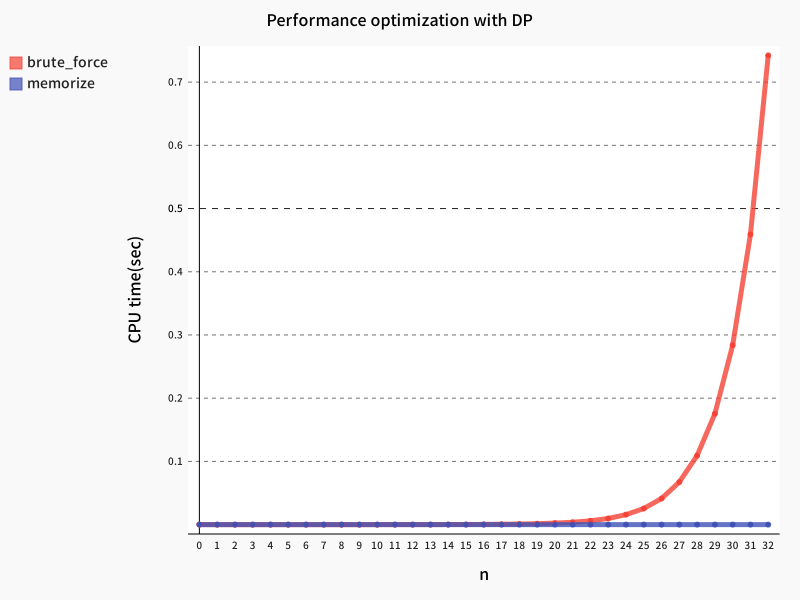

In [10]:
fibonacci_chart = pygal.Line(stroke_style={'width': 5})
fibonacci_chart.title = 'Performance optimization with DP'
fibonacci_chart.y_title = 'CPU time(sec)'
fibonacci_chart.x_title = 'n'
fibonacci_chart.x_labels = map(str, range(small_scale))
fibonacci_chart.add('brute_force', ana_data['brute_force'])
fibonacci_chart.add('memorize', ana_data['memorize'][:small_scale])    
fibonacci_chart

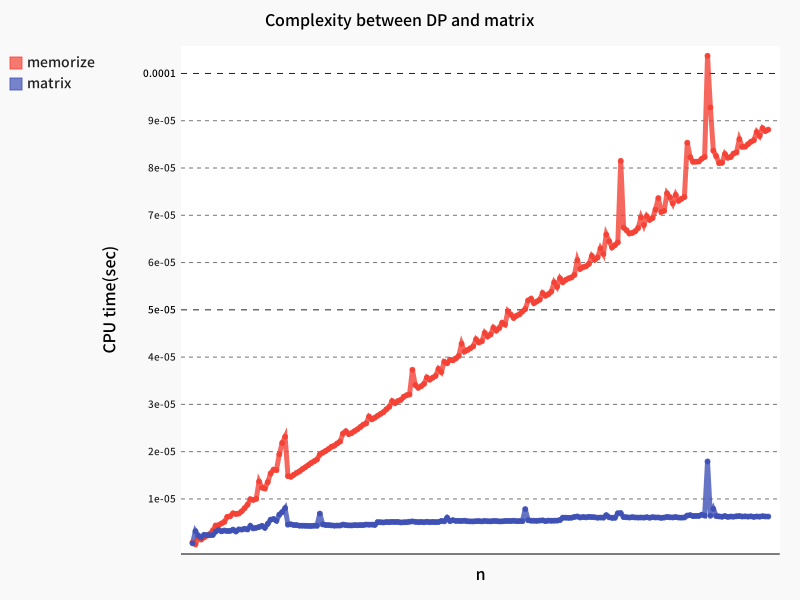

In [11]:
fibonacci_chart = pygal.Line(stroke_style={'width': 5})
fibonacci_chart.title = 'Complexity between DP and matrix'
fibonacci_chart.y_title = 'CPU time(sec)'
fibonacci_chart.x_title = 'n'
fibonacci_chart.add('memorize', ana_data['memorize'][:bigger_scale])
fibonacci_chart.add('matrix', ana_data['matrix'][:bigger_scale])    